# Solucion del Analisis Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)

### Paso 1: Carga del conjunto de datos a tu modelo

In [1]:
# Your code here

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


### Paso 2: Realiza un EDA completo

Veaos primeros las dimimension del dataframe

In [2]:
# Obtener dimensiones
total_data.shape

(3140, 108)

Lo anterior revela que, el DataFrame contiene 3140 registros (numero total de filas) y 108 variables (numero total de columnas).

Ahora vamoa a bbtener información sobre tipos de datos y valores no nulos

In [ ]:
# Información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


Lo anterior revela que:

* Los datos en estas columnas son principalmente números (flotantes y enteros), con algunas columnas que contienen datos de tipo objeto (posiblemente texto o fechas). 
* El DataFrame ocupa alrededor de 2.6 megabytes de memoria.

In [4]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


#### Analisis de variables univariadas

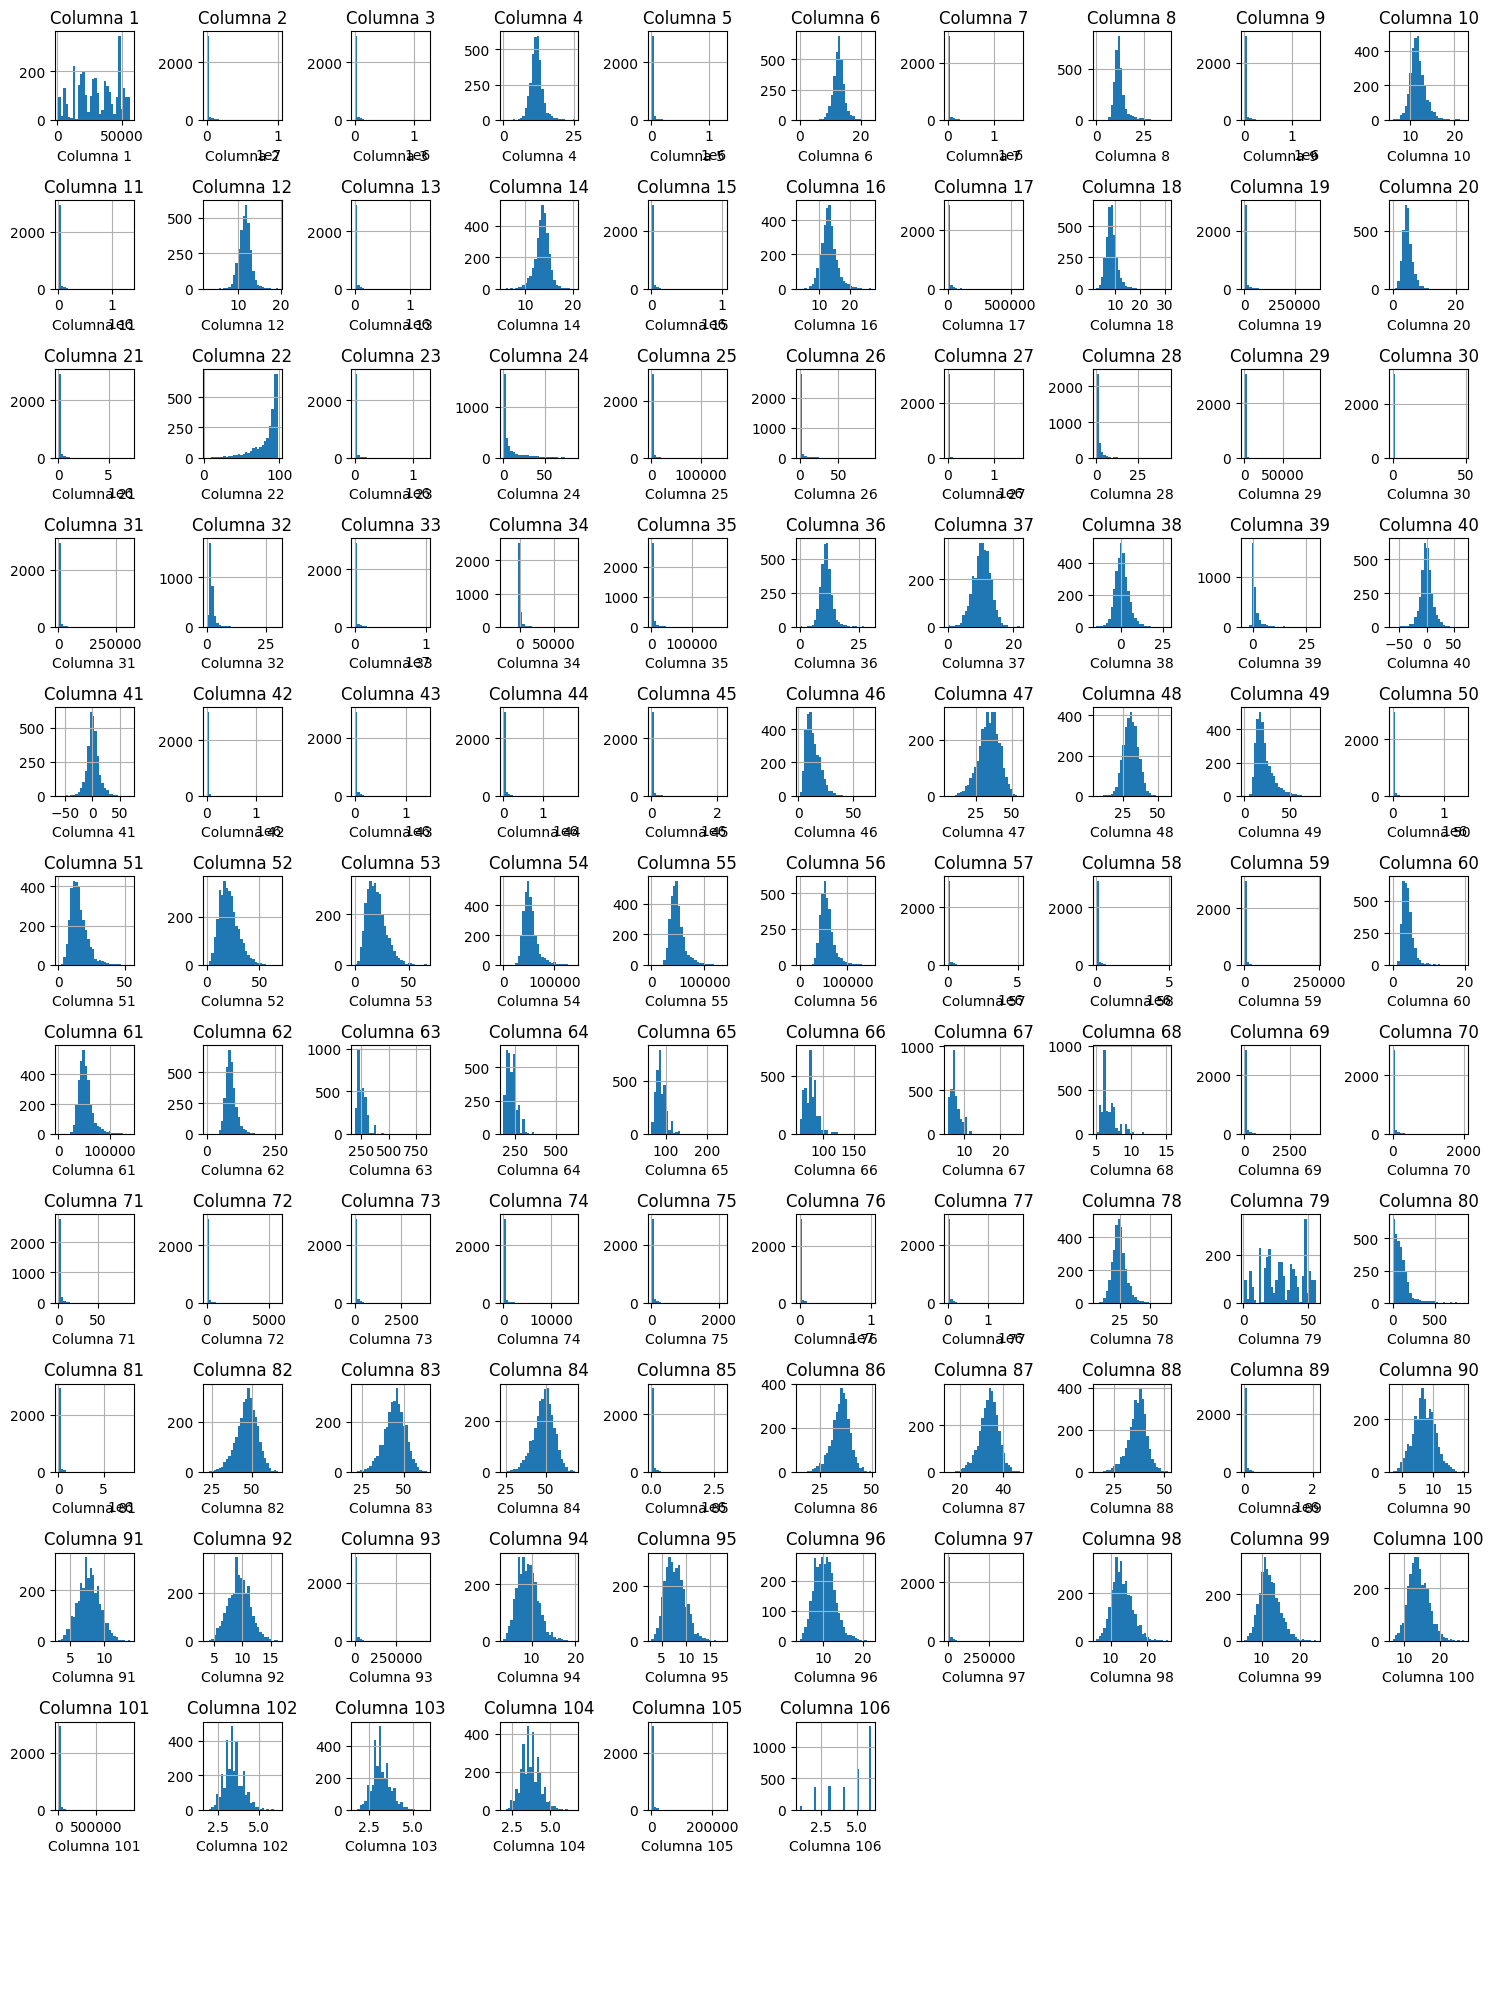

In [32]:
import matplotlib.pyplot as plt

def plot_all_histograms_single_figure(df, n_rows, n_cols, figsize=(15, 20)):
    """
    Traza histogramas para todas las columnas numéricas en un DataFrame en una sola figura con subgráficos.

    Args:
        df: El DataFrame que contiene los datos.
        n_rows: Numero de filas en la cuadricula de la subtrama.
        n_cols: Numero de columnas en la cuadricula de la subtrama.
        figsize: Tupla que especifica el ancho y la altura de la figura.
    """

    # Seleccionar solo las columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns

    # Crear una figura con subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Aplanar la matriz de ejes para iterar más fácilmente
    axes = axes.flatten()

    # Iterar sobre cada columna y crear un histograma
    for i, col in enumerate(num_cols):
        if i < len(axes):
            ax = axes[i]
            df[col].hist(ax=ax, bins=30)
            ax.set_title(f"Columna {i+1}")#, rotation=45, ha='right')  # Mostrar el índice de la columna
            ax.set_xlabel(f"Columna {i+1}") #, rotation=45, ha='right')
            #ax.set_ylabel('Frecuencia')

    # Ocultar subplots vacíos si hay menos columnas que subplots
    for i in range(len(num_cols), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame y el número deseado de filas y columnas
plot_all_histograms_single_figure(total_data, 12, 10)

In [34]:
for i, col in enumerate(total_data):
    print(f"Columna {i+1:2}: {col}")

Columna  1: fips
Columna  2: TOT_POP
Columna  3: 0-9
Columna  4: 0-9 y/o % of total pop
Columna  5: 19-Oct
Columna  6: 10-19 y/o % of total pop
Columna  7: 20-29
Columna  8: 20-29 y/o % of total pop
Columna  9: 30-39
Columna 10: 30-39 y/o % of total pop
Columna 11: 40-49
Columna 12: 40-49 y/o % of total pop
Columna 13: 50-59
Columna 14: 50-59 y/o % of total pop
Columna 15: 60-69
Columna 16: 60-69 y/o % of total pop
Columna 17: 70-79
Columna 18: 70-79 y/o % of total pop
Columna 19: 80+
Columna 20: 80+ y/o % of total pop
Columna 21: White-alone pop
Columna 22: % White-alone
Columna 23: Black-alone pop
Columna 24: % Black-alone
Columna 25: Native American/American Indian-alone pop
Columna 26: % NA/AI-alone
Columna 27: Asian-alone pop
Columna 28: % Asian-alone
Columna 29: Hawaiian/Pacific Islander-alone pop
Columna 30: % Hawaiian/PI-alone
Columna 31: Two or more races pop
Columna 32: % Two or more races
Columna 33: POP_ESTIMATE_2018
Columna 34: N_POP_CHG_2018
Columna 35: GQ_ESTIMATES_2018
